### Dimensionality Reduction Plots 

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE, Isomap

In [2]:
# Dataframe
with open("../Pickles/Content_Parsed.pickle", 'rb') as data:
    df = pickle.load(data)

# features_train
with open("../Pickles/features_train.pickle", 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open("../Pickles/labels_train.pickle", 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open("../Pickles/features_test.pickle", 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open("../Pickles/labels_test.pickle", 'rb') as data:
    labels_test = pickle.load(data)


In [3]:
# shapes of the data

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(2007, 300)
(670, 300)
(2007,)
(670,)


In [4]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)

In [5]:
print(features.shape)
print(labels.shape)

(2677, 300)
(2677,)


In [6]:
def plot_dim_red(model, features, labels, n_components):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot     
    elif (model == 'TSNE'):
        mod = TSNE(n_components=n_components)
        title = "t-SNE decomposition" 
    elif (model == 'SVD'):
        mod = TruncatedSVD(n_components=n_components)
        title = "SVD decomposition"
    elif (model == 'FICA'):
        mod = FastICA(n_components=n_components)
        title = "Factor Analysis decomposition"
    elif (model == 'ISOMAP'):
        mod = Isomap(n_components=n_components, n_neighbors=5)
        title = "ISOMAP Analysis decomposition"
    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {'1' : 'Service Proxy troubleshooting / APIGW', 
          '2' : 'Onboarding generic queries',
          '3' : 'Assessment/rescore queries/early spec/exception requests',
          '4' : 'Access to Tool queries', 
          '5' : 'API Standards queries',
          '6' : 'zally',
          '7' : 'Client libs', 
          '8' : 'Jamstack content reviewer',             
         # 'Redirecting queries to other teams' : '9', 
         # 'Redirect to us' : '10', 
                 }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", 
                             "lightseagreen", "goldenrod", "brown",
                             "darkviolet"],
                    alpha=.7).set_title(title);

### Plots 

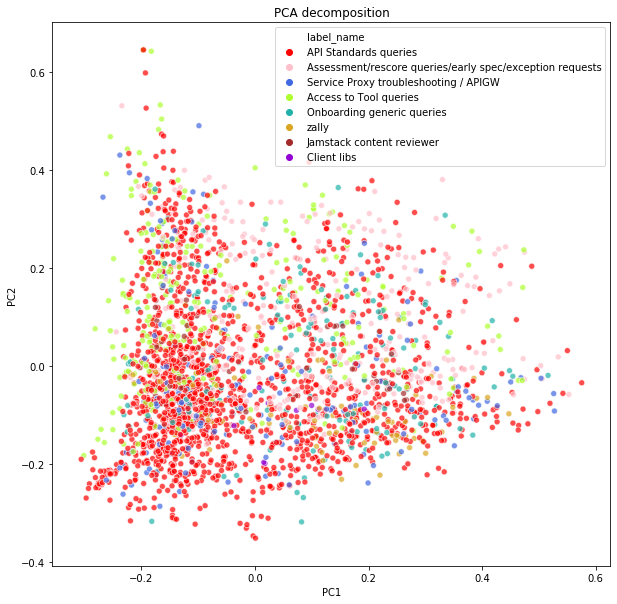

In [7]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

### T-distributed Stochastic Neighbor Embedding (t-SNE)

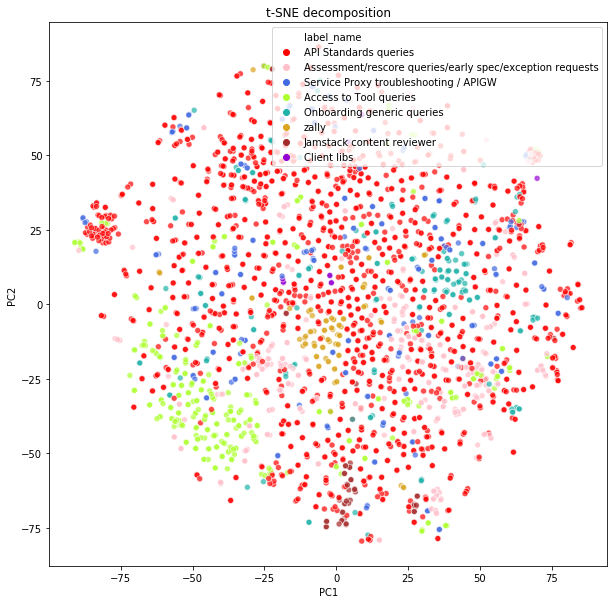

In [8]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

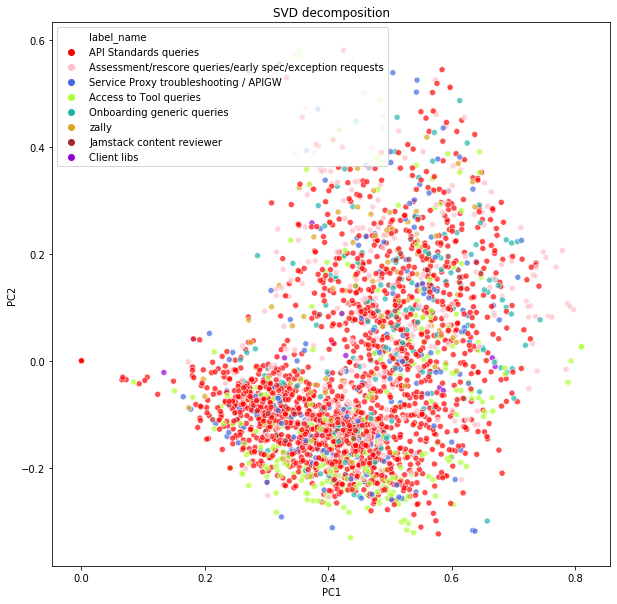

In [9]:
plot_dim_red("SVD", 
             features=features, 
             labels=labels,
             n_components=2)

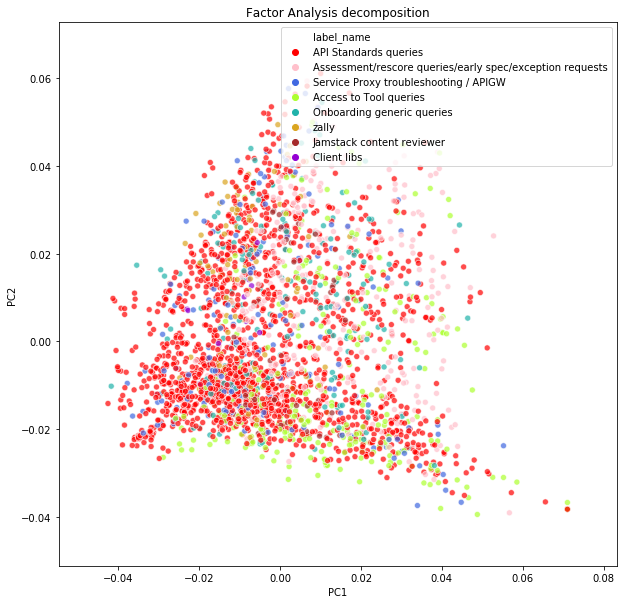

In [10]:
plot_dim_red("FICA", 
             features=features, 
             labels=labels,
             n_components=2)

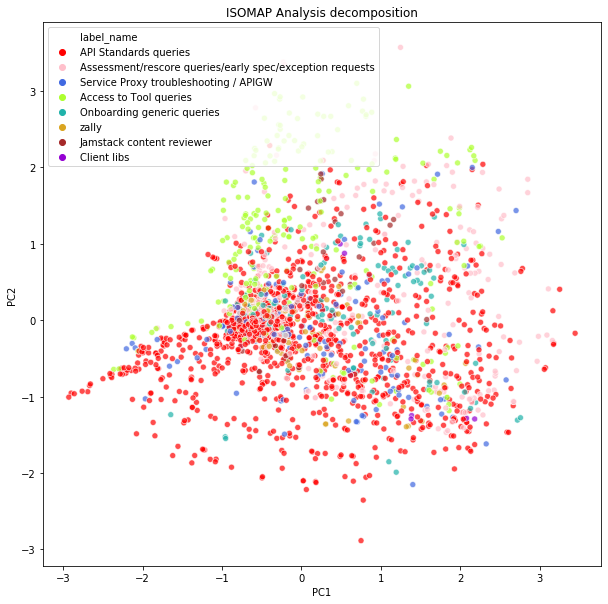

In [11]:
plot_dim_red("ISOMAP", 
             features=features, 
             labels=labels,
             n_components=2)